In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import databricks.koalas as ks
import seaborn as sns

In [0]:
#Leemos la BBDD importada de GIT
tennis_raw = sqlContext.sql("SELECT * FROM tennis_raw")

In [0]:
display(tennis_raw)

tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
2012-D046,Davis Cup WG PO: BEL vs SWE,Clay,4,D,2012-09-14T00:00:00.000+0000,4,105676,nan,nan,David Goffin,R,163.0,BEL,21.7604380561,105436,nan,nan,Markus Eriksson,R,null,SWE,22.781656399699997,6-3 6-4,3,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,56.0,785.0,650.0,34.0
2012-D046,Davis Cup WG PO: BEL vs SWE,Clay,4,D,2012-09-14T00:00:00.000+0000,5,104327,nan,nan,Steve Darcis,R,178.0,BEL,28.4955509925,103714,nan,nan,Andreas Vinciguerra,L,180.0,SWE,31.5564681725,6-4 6-2,3,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,73.0,655.0,null,null
2012-D067,Davis Cup WG PO: BRA vs RUS,Clay,4,D,2012-09-14T00:00:00.000+0000,1,104297,nan,nan,Rogerio Dutra Silva,R,178.0,BRA,28.602327173200003,104214,nan,nan,Igor Andreev,R,185.0,RUS,29.1608487337,6-2 6-1 0-0,5,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,115.0,483.0,96.0,551.0
2012-D067,Davis Cup WG PO: BRA vs RUS,Clay,4,D,2012-09-14T00:00:00.000+0000,2,105064,nan,nan,Thomaz Bellucci,L,188.0,BRA,24.6981519507,104559,nan,nan,Teymuraz Gabashvili,R,188.0,RUS,27.3018480493,6-3 4-6 6-0 7-6(4),5,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,41.0,967.0,163.0,317.0
2012-D067,Davis Cup WG PO: BRA vs RUS,Clay,4,D,2012-09-14T00:00:00.000+0000,4,105064,nan,nan,Thomaz Bellucci,L,188.0,BRA,24.6981519507,104166,nan,nan,Alex Bogomolov Jr,R,178.0,RUS,29.385352498299998,7-6(4) 6-3,3,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,41.0,967.0,90.0,575.0
2012-D067,Davis Cup WG PO: BRA vs RUS,Clay,4,D,2012-09-14T00:00:00.000+0000,5,104297,nan,nan,Rogerio Dutra Silva,R,178.0,BRA,28.602327173200003,105720,nan,nan,Stanislav Vovk,R,185.0,RUS,21.5578370979,6-2 6-2,3,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,115.0,483.0,465.0,74.0
2012-D066,Davis Cup WG PO: CAN vs RSA,Hard,4,D,2012-09-14T00:00:00.000+0000,1,105577,nan,nan,Vasek Pospisil,R,193.0,CAN,22.217659137600002,104292,nan,nan,Izak Van Der Merwe,R,196.0,RSA,28.624229979499997,6-3 6-4 6-4,5,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,116.0,479.0,188.0,267.0
2012-D066,Davis Cup WG PO: CAN vs RSA,Hard,4,D,2012-09-14T00:00:00.000+0000,2,105683,nan,nan,Milos Raonic,R,196.0,CAN,21.7056810404,105707,nan,nan,Nicolaas Scholtz,R,null,RSA,21.5961670089,7-5 6-4 7-5,5,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,15.0,2080.0,null,null
2012-D066,Davis Cup WG PO: CAN vs RSA,Hard,4,D,2012-09-14T00:00:00.000+0000,4,105683,nan,nan,Milos Raonic,R,196.0,CAN,21.7056810404,104292,nan,nan,Izak Van Der Merwe,R,196.0,RSA,28.624229979499997,6-2 6-2 6-4,5,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,15.0,2080.0,188.0,267.0
2012-D066,Davis Cup WG PO: CAN vs RSA,Hard,4,D,2012-09-14T00:00:00.000+0000,5,104433,nan,nan,Frank Dancevic,R,185.0,CAN,27.956194387399997,105707,nan,nan,Nicolaas Scholtz,R,null,RSA,21.5961670089,6-2 6-2,3,RR,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,130.0,414.0,null,null


In [0]:
# Tomamos los datos de los partidos desde 2010

tennis_raw = tennis_raw.where(tennis_raw["tourney_date"] > "2010-01-01T00:00:00.000+0000")

In [0]:
# Convertimos a dataframe de "Koalas"

tennis_raw_ks = tennis_raw.to_koalas()

In [0]:
# Creamos un campo con id único con la concateniación del número de match y el id del torneo

tennis_raw_ks["match_num"] = tennis_raw_ks["match_num"].astype(str)
tennis_raw_ks["id_partido"] = tennis_raw_ks["tourney_id"]+tennis_raw_ks["match_num"]
tennis_raw_ks.set_index("id_partido", inplace=True)

In [0]:
# Reordenamos columnas

tennis_raw_ks = tennis_raw_ks.reindex(["winner_id","winner_seed","winner_entry","winner_name","winner_hand","winner_ht","winner_ioc",	"winner_age","w_ace","w_df","w_svpt","w_1stIn","w_1stWon","w_2ndWon","w_SvGms","w_bpSaved","w_bpFaced",'winner_rank','winner_rank_points',"score","best_of","round","minutes","surface","draw_size","tourney_level","tourney_date","match_num","tourney_id","tourney_name","loser_id","loser_seed","loser_entry","loser_name","loser_hand","loser_ht","loser_ioc","loser_age",'l_ace',"l_df","l_svpt","l_1stIn","l_1stWon","l_2ndWon","l_SvGms","l_bpSaved",'l_bpFaced','loser_rank','loser_rank_points'], axis=1)

In [0]:
# Creamos un df solamente con los winners y asignamos variable binario winner == 1
tennis_winers = tennis_raw_ks.iloc[:,0:30]
tennis_winers["winner"] = 1

In [0]:
# Renombramos columnas

tennis_winers.rename(columns={"winner_id":"player_id","winner_seed":"seed","winner_entry":"entry","winner_name":"player_name","winner_hand":"player_hand","winner_ht":"player_ht","winner_ioc":"player_ioc",	"winner_age":"player_age","w_ace":"ace","w_df":"df","w_svpt":'svpt',"w_1stIn":"1stIn","w_1stWon":"1stWon","w_2ndWon":"2ndWon","w_SvGms":"SvGms","w_bpSaved":"bpSaved","w_bpFaced":"bpFaced",'winner_rank':"player_rank","winner_rank_points":"player_rank_points"}, inplace=True)

In [0]:
# Creamos un df solamente con los loosers y asignamos variable binario winner == 0

tennis_loosers = tennis_raw_ks.iloc[:,19:49]
tennis_loosers["winner"] = 0

In [0]:
# Renombramos columnas

tennis_loosers.rename(columns={"loser_id":"player_id","loser_seed":"seed","loser_entry":"entry","loser_name":"player_name","loser_hand":"player_hand","loser_ht":"player_ht","loser_ioc":"player_ioc","loser_age":"player_age",'l_ace':"ace","l_df":"df","l_svpt":'svpt',"l_1stIn":"1stIn","l_1stWon":"1stWon","l_2ndWon":"2ndWon","l_SvGms":"SvGms","l_bpSaved":"bpSaved",'l_bpFaced':"bpFaced",'loser_rank':"player_rank","loser_rank_points":"player_rank_points"}, inplace=True)

In [0]:
# Unimos ambos dfs para crear uno df total

total_df = ks.concat([tennis_winers,tennis_loosers], axis=0)

In [0]:
# Seleccionamos las columnas que usaremos

regresion_df = total_df[["seed","player_hand","player_ht","player_age","player_name","df","tourney_name","svpt","1stIn","1stWon","2ndWon","SvGms","bpSaved","bpFaced","player_rank","player_rank_points","best_of","round","surface","tourney_level","winner","draw_size","ace"]]

In [0]:
display(regresion_df)

seed,player_hand,player_ht,player_age,player_name,df,tourney_name,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,best_of,round,surface,tourney_level,winner,draw_size,ace
nan,R,163.0,21.7604380561,David Goffin,null,Davis Cup WG PO: BEL vs SWE,null,null,null,null,null,null,null,56.0,785.0,3,RR,Clay,D,1,4,null
nan,R,178.0,28.4955509925,Steve Darcis,null,Davis Cup WG PO: BEL vs SWE,null,null,null,null,null,null,null,73.0,655.0,3,RR,Clay,D,1,4,null
nan,R,178.0,28.602327173200003,Rogerio Dutra Silva,null,Davis Cup WG PO: BRA vs RUS,null,null,null,null,null,null,null,115.0,483.0,5,RR,Clay,D,1,4,null
nan,L,188.0,24.6981519507,Thomaz Bellucci,null,Davis Cup WG PO: BRA vs RUS,null,null,null,null,null,null,null,41.0,967.0,5,RR,Clay,D,1,4,null
nan,L,188.0,24.6981519507,Thomaz Bellucci,null,Davis Cup WG PO: BRA vs RUS,null,null,null,null,null,null,null,41.0,967.0,3,RR,Clay,D,1,4,null
nan,R,178.0,28.602327173200003,Rogerio Dutra Silva,null,Davis Cup WG PO: BRA vs RUS,null,null,null,null,null,null,null,115.0,483.0,3,RR,Clay,D,1,4,null
nan,R,193.0,22.217659137600002,Vasek Pospisil,null,Davis Cup WG PO: CAN vs RSA,null,null,null,null,null,null,null,116.0,479.0,5,RR,Hard,D,1,4,null
nan,R,196.0,21.7056810404,Milos Raonic,null,Davis Cup WG PO: CAN vs RSA,null,null,null,null,null,null,null,15.0,2080.0,5,RR,Hard,D,1,4,null
nan,R,196.0,21.7056810404,Milos Raonic,null,Davis Cup WG PO: CAN vs RSA,null,null,null,null,null,null,null,15.0,2080.0,5,RR,Hard,D,1,4,null
nan,R,185.0,27.956194387399997,Frank Dancevic,null,Davis Cup WG PO: CAN vs RSA,null,null,null,null,null,null,null,130.0,414.0,3,RR,Hard,D,1,4,null


In [0]:
# Creamos una variable que contendrá la media de aces por jugador, superficie, edad, nivel de torneo, ganador y draw size

mean_aces_df = ks.DataFrame(regresion_df.groupby(["player_name","surface","player_age","tourney_level","draw_size","winner"])["ace"].mean()).rename(columns={"ace":"aces_mean"})
mean_aces_df.reset_index(inplace=True)
mean_aces_df = mean_aces_df[["player_name","surface","player_age","tourney_level","draw_size","winner","aces_mean"]]
regresion_df = ks.merge(regresion_df,mean_aces_df, on = ["player_name","surface","player_age","tourney_level","draw_size","winner"])


In [0]:
# Nos dehacemos de los registros que tienen valores nulos o 0

regresion_df = regresion_df.dropna(subset=["player_ht","player_age","ace","player_rank_points","player_rank","surface","player_hand","tourney_level","draw_size","seed"])

In [0]:
display(regresion_df)

seed,player_hand,player_ht,player_age,player_name,df,tourney_name,svpt,1stIn,1stWon,2ndWon,SvGms,bpSaved,bpFaced,player_rank,player_rank_points,best_of,round,surface,tourney_level,winner,draw_size,ace,aces_mean
17.0,R,178.0,29.2484599589,Philipp Kohlschreiber,0.0,Australian Open,88.0,53.0,48.0,23.0,15.0,3.0,3.0,19.0,1830.0,5,R64,Hard,G,1,128,12.0,11.0
17.0,R,178.0,29.2484599589,Philipp Kohlschreiber,2.0,Australian Open,76.0,50.0,46.0,12.0,14.0,3.0,3.0,19.0,1830.0,5,R128,Hard,G,1,128,10.0,11.0
1.0,R,183.0,27.630390143699998,Nicolas Almagro,2.0,Houston,45.0,28.0,23.0,8.0,8.0,2.0,3.0,12.0,2390.0,3,SF,Clay,A,1,28,7.0,6.333333333333333
1.0,R,183.0,27.630390143699998,Nicolas Almagro,1.0,Houston,59.0,32.0,24.0,17.0,10.0,2.0,3.0,12.0,2390.0,3,QF,Clay,A,1,28,9.0,6.333333333333333
1.0,R,183.0,27.630390143699998,Nicolas Almagro,1.0,Houston,71.0,31.0,23.0,25.0,12.0,5.0,7.0,12.0,2390.0,3,R16,Clay,A,1,28,3.0,6.333333333333333
nan,R,190.0,24.7008898015,Ernests Gulbis,2.0,Rome Masters,43.0,23.0,21.0,9.0,7.0,2.0,2.0,46.0,885.0,3,R32,Clay,M,1,56,4.0,4.0
nan,R,190.0,24.7008898015,Ernests Gulbis,8.0,Rome Masters,79.0,44.0,35.0,19.0,10.0,6.0,6.0,46.0,885.0,3,R64,Clay,M,1,56,4.0,4.0
nan,R,193.0,26.869267624899997,Gael Monfils,3.0,Hamburg,64.0,44.0,30.0,9.0,9.0,6.0,8.0,59.0,800.0,3,R64,Clay,A,1,48,2.0,2.0
2.0,R,183.0,31.227926078000003,Mikhail Youzhny,5.0,St. Petersburg,88.0,50.0,41.0,20.0,14.0,3.0,3.0,20.0,1825.0,3,R32,Hard,A,1,32,4.0,4.0
nan,R,188.0,26.6666666667,Leonardo Mayer,1.0,Australian Open,54.0,33.0,31.0,13.0,11.0,0.0,0.0,98.0,579.0,5,R128,Hard,G,1,128,13.0,13.0


In [0]:
# Vectorizamos variables categóricas

surface = ks.get_dummies(regresion_df["surface"])
regresion_df = ks.concat([regresion_df, surface], axis=1)

hand = ks.get_dummies(regresion_df["player_hand"])
regresion_df = ks.concat([regresion_df, hand], axis=1)

level_tourney = ks.get_dummies(regresion_df["tourney_level"])
regresion_df = ks.concat([regresion_df, level_tourney], axis=1)

draw_size = ks.get_dummies(regresion_df["draw_size"])
regresion_df = ks.concat([regresion_df, draw_size], axis=1)


In [0]:
# Reordenamos columnas

regresion_df = regresion_df.reindex(['player_ht','player_age','player_name','player_rank','player_rank_points','winner','Carpet','Clay','Grass','Hard','L','R','U','A','D','F','G','M',4,8,28,32,48,56,64,96,128,'aces_mean','ace'],axis = 1)

In [0]:
regresion_df["aces_mean"] = regresion_df["aces_mean"].astype("float").round(2)

In [0]:
"""Vemos un resumen del modo en que están distribuidos los datos"""

regresion_df.describe()

Out[21]:

,player_ht,player_age,player_rank,player_rank_points,winner,Carpet,Clay,Grass,Hard,L,R,U,A,D,F,G,M,4,8,28,32,48,56,64,96,128,aces_mean,ace
count,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,0.0,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.00000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000,47001.000000
mean,186.439331,28.258996,62.635859,1695.031297,0.517202,0.000170,0.304823,0.116763,0.577583,0.135444,0.864556,NaN,0.568775,0.013085,0.006468,0.195272,0.216400,0.013085,0.00583,0.183656,0.306228,0.049659,0.097977,0.075722,0.046680,0.218719,6.346844,6.346844
std,7.351609,3.676379,78.491654,2128.106289,0.499709,0.013045,0.460337,0.321142,0.493949,0.342201,0.342201,NaN,0.495253,0.113639,0.080164,0.396415,0.411794,0.113639,0.07613,0.387207,0.460930,0.217241,0.297286,0.264555,0.210954,0.413382,5.304438,5.640216
min,163.000000,16.235455,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.000000,25.642710,21.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
50%,185.000000,28.287474,46.000000,960.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
75%,190.000000,30.776181,80.000000,1710.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.600000,9.000000
max,208.000000,44.060233,1890.000000,16950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,113.000000,113.000000


In [0]:
# Eliminamos los registros que tienen un valor de "ACE" superior a 34 por considerarse outliers

regresion_df = regresion_df[regresion_df["ace"]<34]

In [0]:
display(regresion_df)

player_ht,player_age,player_name,player_rank,player_rank_points,winner,Carpet,Clay,Grass,Hard,L,R,U,A,D,F,G,M,4,8,28,32,48,56,64,96,128,aces_mean,ace
178.0,29.2484599589,Philipp Kohlschreiber,19.0,1830.0,1,0,0,0,1,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.0,12.0
178.0,29.2484599589,Philipp Kohlschreiber,19.0,1830.0,1,0,0,0,1,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.0,10.0
183.0,27.630390143699998,Nicolas Almagro,12.0,2390.0,1,0,1,0,0,0,1,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,7.0
183.0,27.630390143699998,Nicolas Almagro,12.0,2390.0,1,0,1,0,0,0,1,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,9.0
183.0,27.630390143699998,Nicolas Almagro,12.0,2390.0,1,0,1,0,0,0,1,NaN,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,3.0
190.0,24.7008898015,Ernests Gulbis,46.0,885.0,1,0,1,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,4.0
190.0,24.7008898015,Ernests Gulbis,46.0,885.0,1,0,1,0,0,0,1,NaN,0,0,0,0,1,0,0,0,0,0,1,0,0,0,4.0,4.0
193.0,26.869267624899997,Gael Monfils,59.0,800.0,1,0,1,0,0,0,1,NaN,1,0,0,0,0,0,0,0,0,1,0,0,0,0,2.0,2.0
183.0,31.227926078000003,Mikhail Youzhny,20.0,1825.0,1,0,0,0,1,0,1,NaN,1,0,0,0,0,0,0,0,1,0,0,0,0,0,4.0,4.0
188.0,26.6666666667,Leonardo Mayer,98.0,579.0,1,0,0,0,1,0,1,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,1,13.0,13.0


##MODELO DE REGRESIÓN

In [0]:
regresion_df_pandas = regresion_df.toPandas()

/databricks/python/lib/python3.7/site-packages/databricks/koalas/frame.py:4275: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
 FutureWarning,

In [0]:
regresion_df_final = regresion_df_pandas[['player_ht','player_age','Carpet','Clay','Grass','Hard','A','D','F','G','M',4,8,28,32,48,56,64,96,128,'aces_mean','ace']]

Out[38]:

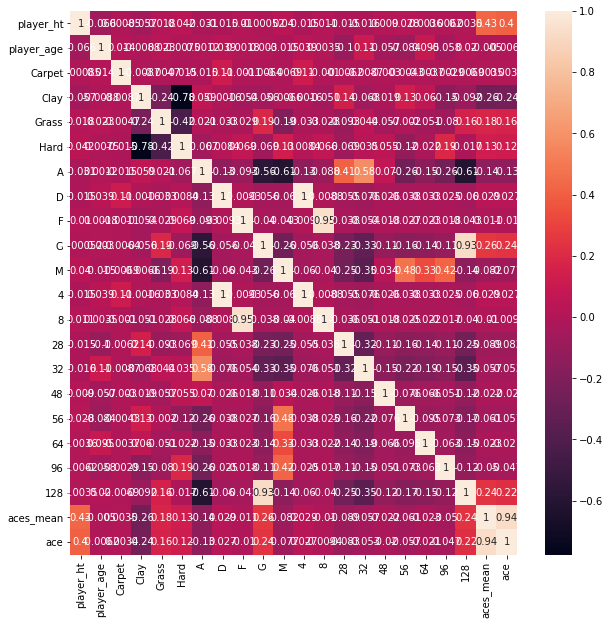

<matplotlib.axes._subplots.AxesSubplot at 0x7f11d23c0f10>

In [0]:
#calculamos la matriz de correlación y la mostramos graficamente

matriz_corr = regresion_df_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matriz_corr,xticklabels=matriz_corr.columns,yticklabels=matriz_corr.columns,annot=True)

In [0]:
regresion_df_final

Out[39]:

,player_ht,player_age,Carpet,Clay,Grass,Hard,A,D,F,G,M,4,8,28,32,48,56,64,96,128,aces_mean,ace
3,178.0,29.248460,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.00,12.0
4,178.0,29.248460,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.00,10.0
5,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,7.0
6,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,9.0
7,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61541,196.0,24.509240,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5.00,5.0
61542,193.0,26.466804,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.00,0.0
61543,190.0,30.464066,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,5.00,5.0
61544,203.0,26.201232,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,11.00,11.0


In [0]:
#Seleccionamos las variables dependientes e independientes
x_features = regresion_df_final.iloc[:,0:21]
y_target = regresion_df_final.iloc[:,21]

In [0]:
x_features

Out[41]:

,player_ht,player_age,Carpet,Clay,Grass,Hard,A,D,F,G,M,4,8,28,32,48,56,64,96,128,aces_mean
3,178.0,29.248460,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.00
4,178.0,29.248460,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.00
5,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33
6,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33
7,183.0,27.630390,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61541,196.0,24.509240,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,5.00
61542,193.0,26.466804,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.00
61543,190.0,30.464066,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,5.00
61544,203.0,26.201232,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,11.00


In [0]:
y_target

Out[42]: 3 12.0
4 10.0
5 7.0
6 9.0
7 3.0
 ... 
61541 5.0
61542 0.0
61543 5.0
61544 11.0
61545 4.0
Name: ace, Length: 46865, dtype: float64

In [0]:
# Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.2)

In [0]:
# Aplicamos la regresión a los datos

lr_multiple = linear_model.LinearRegression()

lr_multiple.fit(X_train, y_train)

Out[44]: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Realizamos las predicciones para Y

Y_pred_multiple = lr_multiple.predict(X_test)

In [0]:
# Valores de los coeficientes y término independiente

print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de los coeficientes:')
print(lr_multiple.coef_)
print('Valor del término independiente:')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de los coeficientes:
[-8.50842291e-04 -1.43351486e-03 2.42469061e-01 1.55368066e-01
 1.63942566e-01 1.75460619e-01 -4.40076765e-03 -4.11783016e-02
 3.40988177e-02 5.59342154e-03 5.88683000e-03 -4.11783016e-02
 1.70062959e-02 -3.55407505e-02 -3.75291731e-02 -8.54126520e-02
 -5.58081921e-02 -4.59752936e-02 -6.75359106e-02 -6.74885744e-02
 9.87712149e-01]
Valor del término independiente:
0.1483170158543734

In [0]:
#Precisión del modelo

print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train)*100,"%")

Precisión del modelo:
87.75463528039214 %